# Decision Trees
dev: mehdi sahraei

## importing

In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Reading the data with pandas

In [116]:
#delimiter: as a separating boundary which distinguishes between any two subsequent data item
my_data = pd.read_csv("glass.csv", delimiter=",")
my_data[0:5]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [117]:
my_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

#### - To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [120]:
X = my_data[['RI', 'Mg', 'Ba', 'K']].values
y = my_data["Type"].astype('str')

print(X[0:5],'\n')
print(y[0:5])

[[1.52101 4.49    0.      0.06   ]
 [1.51761 3.6     0.      0.48   ]
 [1.51618 3.55    0.      0.39   ]
 [1.51766 3.69    0.      0.57   ]
 [1.51742 3.62    0.      0.55   ]] 

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: object


### Making dataset   -    Train Test Split

In [121]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=4)
y_trainset

175    5
29     1
24     1
5      1
146    3
      ..
129    2
197    7
183    6
174    5
122    2
Name: Type, Length: 149, dtype: object

### Training Model
[link-DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [122]:
drugTree = DecisionTreeClassifier(criterion="gini", max_depth = 4)
drugTree 

DecisionTreeClassifier(max_depth=4)

In [123]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(max_depth=4)

### Prediction

In [124]:
predTree = drugTree.predict(X_testset) #y-hat

In [126]:
print (predTree [0:5])
print (y_testset [0:5].values)

['1' '7' '2' '1' '2']
['1' '7' '2' '1' '2']


/tmp/ipykernel_5428/2304716785.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print (y_testset [0:5].values)


### Accuracy evaluation


In [127]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7538461538461538


### Data Visualization
- You must download and install the following libraries

In [54]:
# !sudo apt-get install graphviz
# !pip3 install pydotplus 
# !pip3 install graphviz 

In [128]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

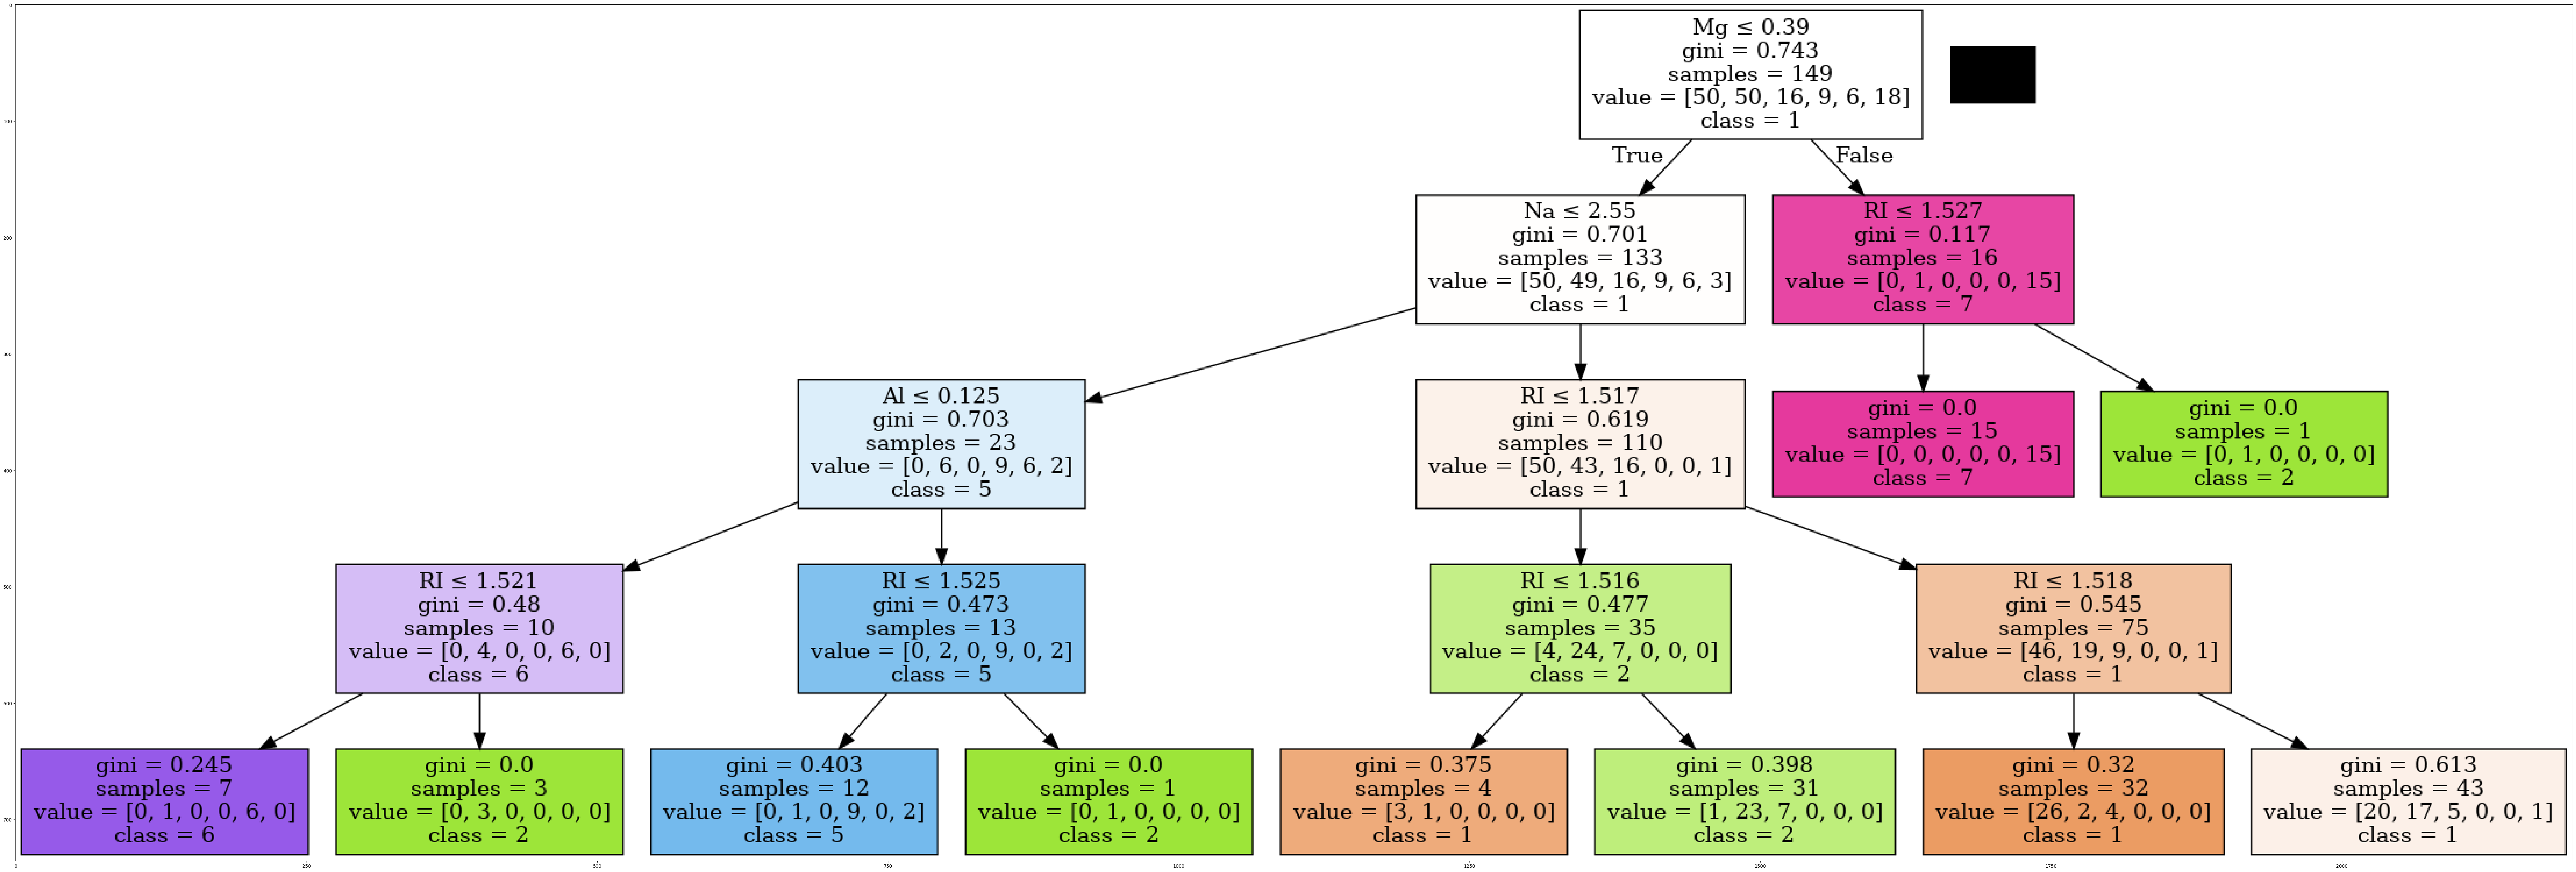

In [129]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:4]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')